# StartUp Funding

###### A startup with a brilliant business idea is aiming to get its operations up and running. From humble beginnings, the company proves the worthiness of its model and products, steadily growing thanks to the generosity of friends, family, and the founders' own financial resources. Over time, its customer base begins to grow, and the business begins to expand its operations and its aims. Before long, the company has risen through the ranks of its competitors to become highly valued, opening the possibilities for future expansion to include new offices, employees, and even an initial public offering (IPO)

This project shows the insights of funding done by startups and how growth changed with several factors. The aim of paper is to get a descriptive overview and a relationship pattern of funding and growth of newly launched startups. Another important point to understand how funding changes with time is an important aspect. Possible area of interests would be – (Funding ecosystem and time relation, cities as a important factor, which industries, important investors). Dataset we are using contains information of funding of startups from 1980 to 2014.The amount invested is in USD. Aggregation of data w.r.t cities, investors, funding type etc. is required to get an optimized result. Here we done major preprocessing of data and overcome problem of missing data and uncertain distributions. Also, Visualizations are done to find the anomalies and mining patterns from data. It seems to be some cities showing some abnormal behavior when it comes to funding

In [1]:
#Import some useful libraries

import pandas as pd
import seaborn as sns
import squarify
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import preprocessing

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
## Function for providing summary in dataframe
%matplotlib inline

def funding_information(data,name):
    company = data[data['name'] == name]
    print ("Company : ", name)
    print ("Total Funding : ", company.funding_total_usd.values[0] , " $")
    print ("Seed Funding : ", company.seed.values[0] , " $")
    print ("Angle Funding :", company.angel.values[0] , " $")
    print ("Grant Funding : ",company.grant.values[0] , " $")
    print ("Product Crowd Funding : ",company.product_crowdfunding.values[0] , " $")
    print ("Equity Crowd Funding : ",company.equity_crowdfunding.values[0] , " $")
    print ("Undisclode Funding : ", company.undisclosed.values[0] , " $")
    print ("Convertible Note : ", company.convertible_note.values[0] , " $")
    print ("Debt Financing : ", company.debt_financing.values[0] , " $")
    print ("Private Equity : ",company.private_equity.values[0] , " $")
    print ("PostIPO Equity : ",company.post_ipo_equity.values[0] , " $")
    print ("PostIPO Debt : ",company.post_ipo_debt.values[0] , " $")
    print ("Secondary Market : ",company.secondary_market.values[0] , " $")
    print ("Venture Funding : ",company.venture.values[0] , " $")
    print ("Round A funding : ",company.round_A.values[0] , " $")
    print ("Round B funding : ",company.round_B.values[0] , " $")
    print ("Round C funding : ",company.round_C.values[0] , " $")
    print ("Round D funding : ",company.round_D.values[0] , " $")
    print ("Round E funding : ",company.round_E.values[0] , " $")
    print ("Round F funding : ",company.round_F.values[0] , " $")
    print ("Round G funding : ",company.round_G.values[0] , " $")
    print ("Round H funding : ",company.round_H.values[0] , " $")

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = [     ]
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=750, 
                      background_color=color, 
                      max_words=50,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [2]:
data = pd.read_csv("D:/mit wpu/sem 3/ml mini project/investments.csv",encoding = "ISO-8859-1")

Loading data into data frame

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null int64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null int64
venture           

In [4]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(data)

49438

In [6]:
data.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,...,0,0,1587301,0,0,0,0,0,0,0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,...,0,0,0,0,0,0,0,0,0,0
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
49437,/organization/x,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,"4,50,00,000",operating,USA,NY,New York City,...,0,0,16000000,10000000,0,0,0,0,0,0


As you can see in two outputs above, we have 54,294 rows of data but some of them not contain any information. It may lead to misdirection summary when we do some analysis or visualize them.

Then, we just remove them by select only data which has "name" column

In [7]:
## select only data which name is not null

data = data[~data.name.isna()]

In [8]:
len(data)

49437

49437
we have around 49,437 companies left in our datase

In [9]:
print( data.columns.values )

['permalink' 'name' 'homepage_url' 'category_list' ' market '
 ' funding_total_usd ' 'status' 'country_code' 'state_code' 'region'
 'city' 'funding_rounds' 'founded_at' 'founded_month' 'founded_quarter'
 'founded_year' 'first_funding_at' 'last_funding_at' 'seed' 'venture'
 'equity_crowdfunding' 'undisclosed' 'convertible_note' 'debt_financing'
 'angel' 'grant' 'private_equity' 'post_ipo_equity' 'post_ipo_debt'
 'secondary_market' 'product_crowdfunding' 'round_A' 'round_B' 'round_C'
 'round_D' 'round_E' 'round_F' 'round_G' 'round_H']


some column name contains space in string, we decide to remove them first.

In [10]:
data.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

In [11]:
print("Frequency count of missing values")
data.apply(lambda X:sum(X.isnull())) 
#apply function is used to do mapping column-wise
#apply function can apply tranformations to each column individually

Frequency count of missing values


permalink                   0
name                        0
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                   1314
country_code             5272
state_code              19276
region                   5272
city                     6115
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

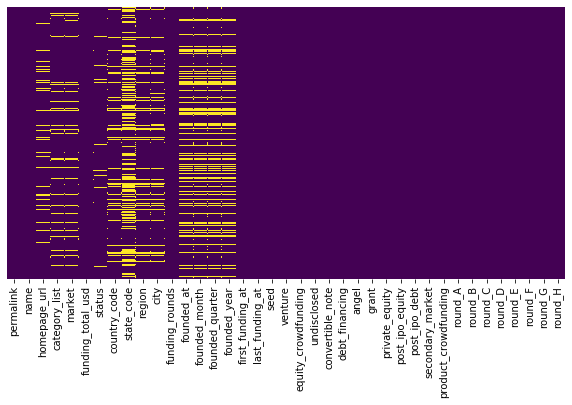

In [12]:
plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()

## data cleaning

In [13]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(data.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 39 columns):
permalink               49437 non-null object
name                    49437 non-null object
homepage_url            45988 non-null object
category_list           45476 non-null object
market                  45469 non-null object
funding_total_usd       49437 non-null object
status                  48123 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49437 non-null int64
founded_at              38553 non-null object
founded_month           38481 non-null object
founded_quarter         38481 non-null object
founded_year            38481 non-null float64
first_funding_at        49437 non-null object
last_fundi

Next, we will delete conditions with only zero startup

In [14]:
df_condition = data.groupby(['city'])['market'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

,city,market
4168,Ferrières,0
4169,Fort Dodge,0
4170,France,0
4171,Frontenac,0
4172,Frunze,0
4173,Garching Bei München,0
4174,Garland,0
4175,Glenrothes,0
4176,Goes,0
4177,Gometz-la-ville,0


In [15]:
print("Frequency count of missing values")
data.apply(lambda X:sum(X.isnull())) 

Frequency count of missing values


permalink                   0
name                        0
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                   1314
country_code             5272
state_code              19276
region                   5272
city                     6115
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

Text(0.5, 1.0, 'Total Missing Value ')

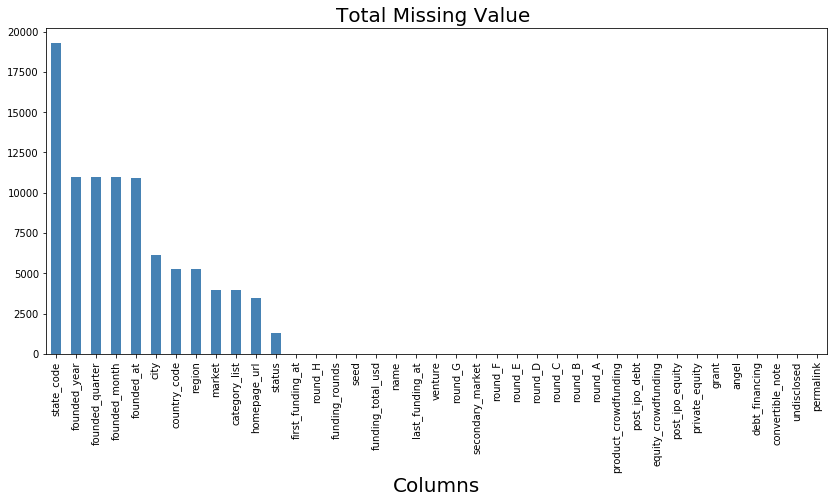

In [16]:
percent = (data.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='steelblue')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [17]:
print(data.describe())

       funding_rounds  founded_year         seed       venture  \
count        49437.00      38481.00     49437.00      49437.00   
mean             1.70       2007.36    217325.39    7501202.27   
std              1.29          7.58   1056995.16   28471392.13   
min              1.00       1902.00         0.00          0.00   
25%              1.00       2006.00         0.00          0.00   
50%              1.00       2010.00         0.00          0.00   
75%              2.00       2012.00     25000.00    5000000.00   
max             18.00       2014.00 130000000.00 2351000000.00   

       equity_crowdfunding  undisclosed  convertible_note  debt_financing  \
count             49437.00     49437.00          49437.00        49437.00   
mean               6163.45    130223.92          23364.57      1888195.09   
std              199906.84   2981433.75        1432060.21    138205963.71   
min                   0.00         0.00              0.00            0.00   
25%                 

In [18]:
data['funding_total_usd'].describe()

count     49437
unique    14617
top        -   
freq       8531
Name: funding_total_usd, dtype: object

In [19]:
data["funding_total_usd"].replace(15912914, np.nan, inplace= True)
#replacing with mean

In [20]:
data.fillna(method='bfill')

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,TX,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,TX,London,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,http://nic.club/,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NY,London,...,0,0,0,0,0,0,0,0,0,0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NY,Beijing,...,0,0,1587301,0,0,0,0,0,0,0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NY,Split,...,0,0,0,0,0,0,0,0,0,0
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0


# EDA
lets understand what is there in this data

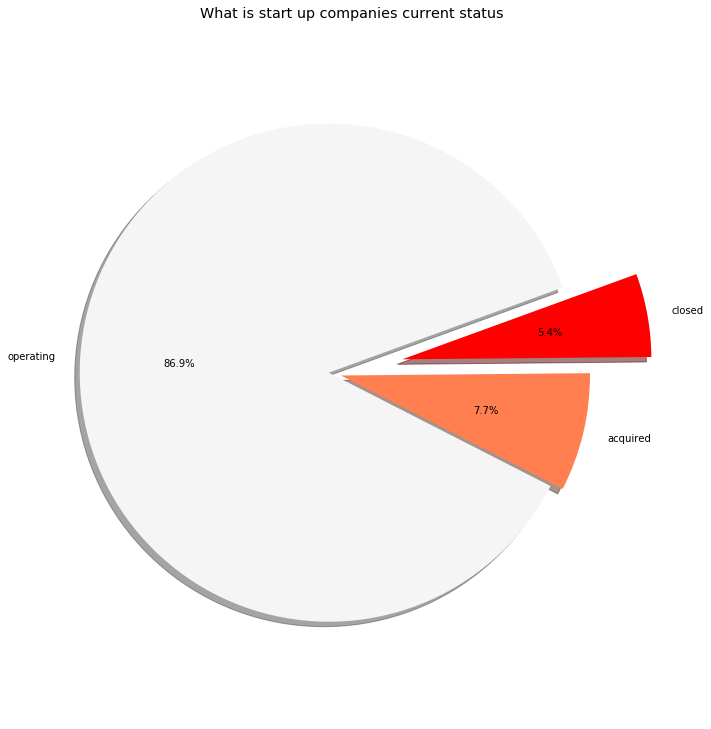

In [21]:
plt.rcParams['figure.figsize'] = 10,10
labels = data['status'].value_counts().index.tolist()
sizes = data['status'].value_counts().tolist()
explode = (0, 0.050,0.3)
colors = ['whitesmoke','coral','red']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=20)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status", fontdict=None, position= [0.48,1], size = 'x-large')
plt.show()

Most of company (86.9 %) in this dataset is operating, and around 5.4 % company is already closed.

In [22]:
data['status'].value_counts()

operating    41829
acquired      3692
closed        2602
Name: status, dtype: int64

In [23]:
len(data['market'].unique())

754

In [24]:
data['market'].value_counts()[:5]

 Software          4620
 Biotechnology     3688
 Mobile            1983
 E-Commerce        1805
 Curated Web       1655
Name: market, dtype: int64

because we have around 754 categories of start up, Then just plot the top 15 : )

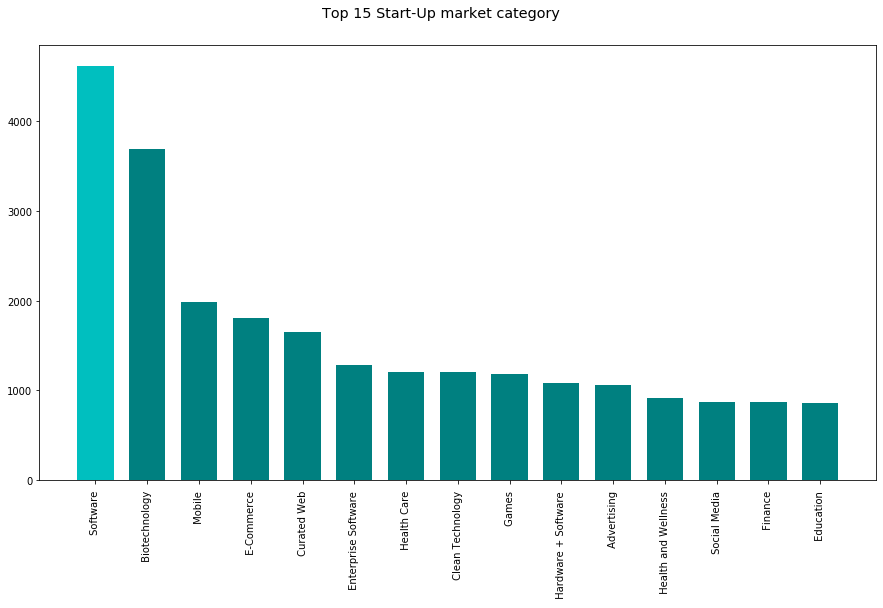

In [25]:
plt.rcParams['figure.figsize'] = 15,8

height = data['market'].value_counts()[:15].tolist()
bars =  data['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['teal']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

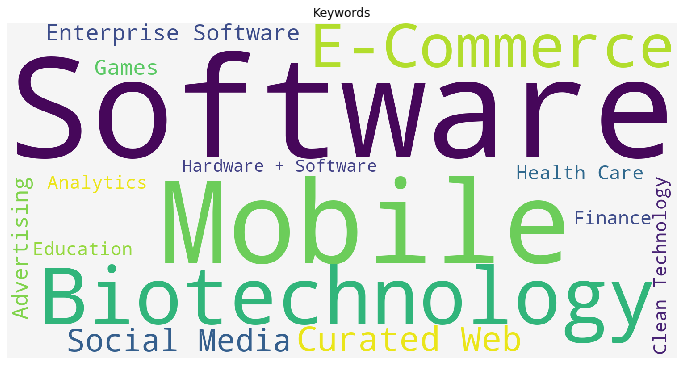

In [26]:
set_keywords = set()
for liste_keywords in data['category_list'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')
keyword_occurences, dum = count_word(data, 'category_list', set_keywords)

makeCloud(keyword_occurences[0:15],"Keywords","Whitesmoke")

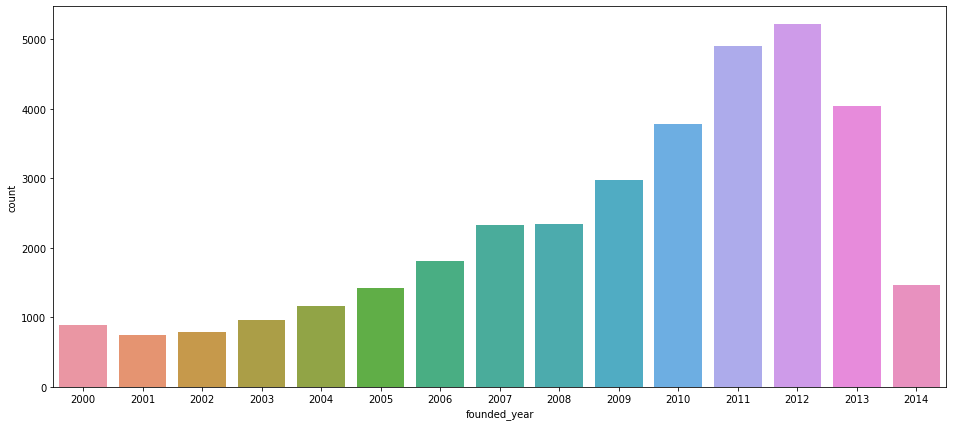

In [27]:
df_new = data[data['founded_year'] >= 2000]
df_new['founded_year'] = df_new['founded_year'].astype(int)
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year', data = df_new)
plt.show()

the above fig shows year wise startup has been founded

now lets look at the countries in which startup has been founded

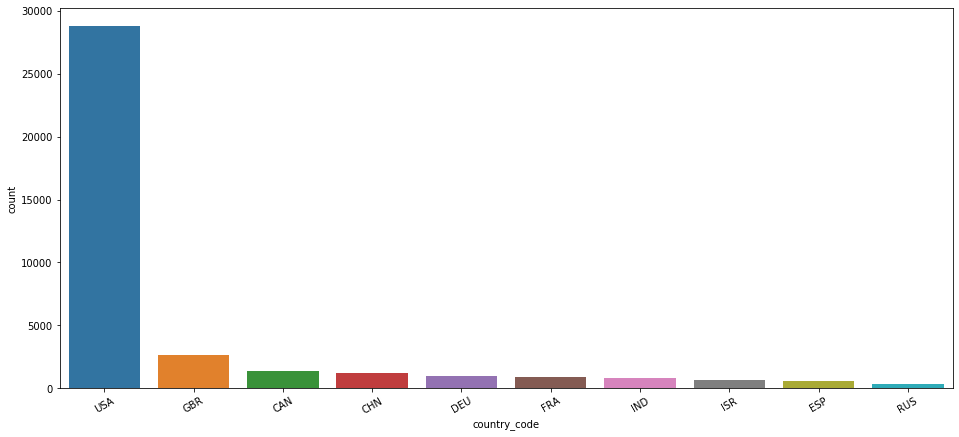

In [28]:
plt.figure(figsize=(16,7))
g = sns.countplot(x ='country_code', data = data, order=data['country_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

we can see that USA has more number of startup

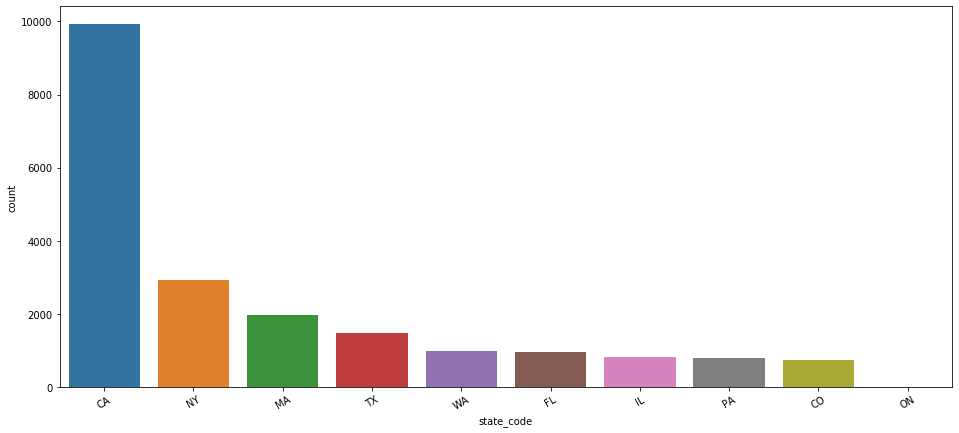

In [29]:
df_USA = data[(data['country_code'] =='USA')]
plt.figure(figsize=(16,7))
g = sns.countplot(x ='state_code', data = df_USA, order=data['state_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

Text(0.5, 1.0, 'Top20 : The number of of startups in a city')

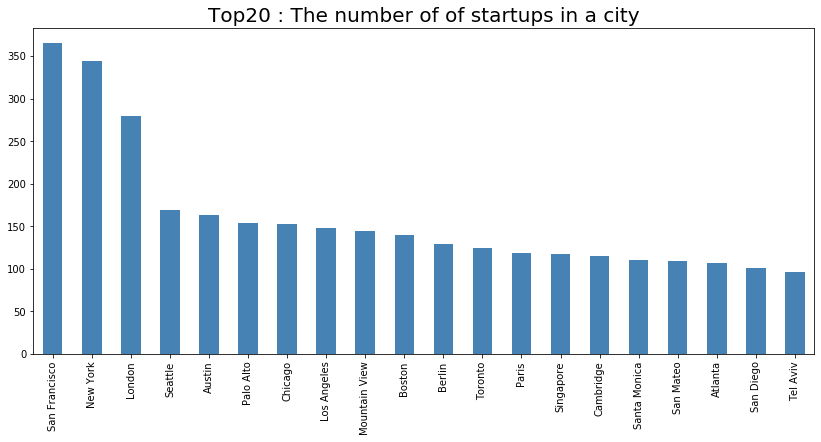

In [30]:
city_market = data.groupby(['city'])['market'].nunique().sort_values(ascending=False)
city_market[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="steelblue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of of startups in a city", fontsize = 20)

##### Country_code with MarkeT

In [31]:
data['count'] = 1
country_market = data[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

I want to know the different of startup market between USA and our country

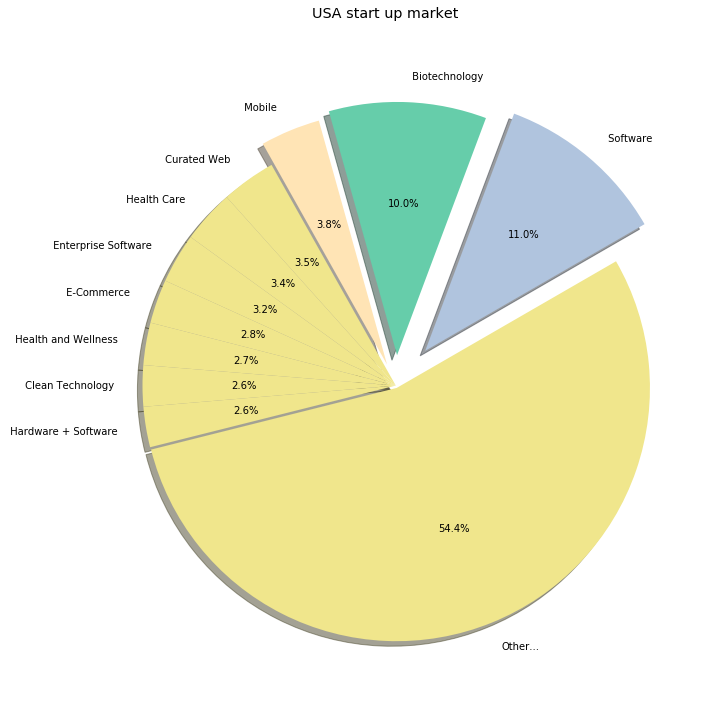

In [32]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]


## USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['lightsteelblue','mediumaquamarine','moccasin'] +['khaki']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

For USA, Most of start up market is about Software & Technology

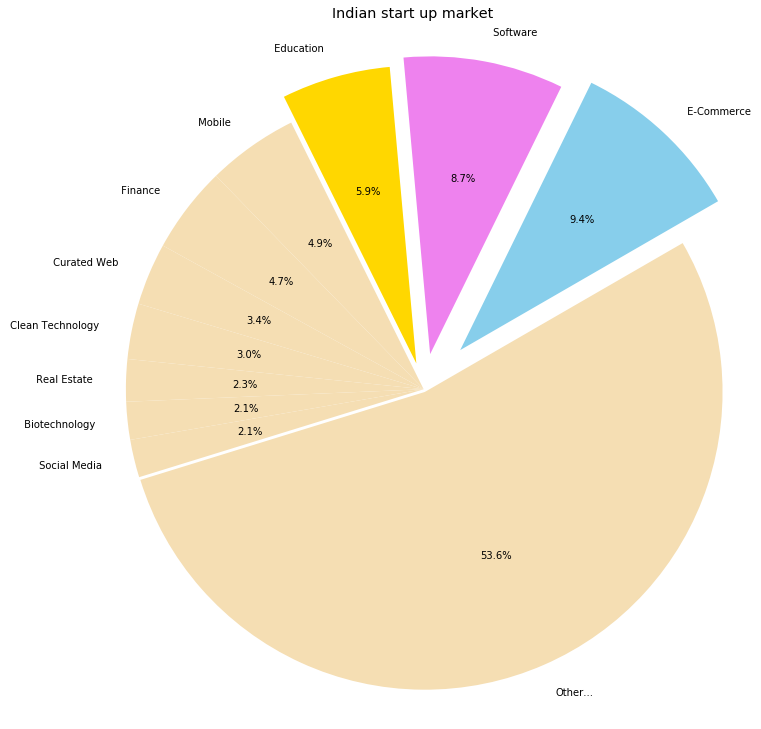

In [33]:
IND_market_pct = country_market_pct[country_market_pct['country_code'] == "IND"]
IND_market_pct = IND_market_pct.sort_values('count',ascending = False)[0:10]
plt.rcParams['figure.figsize'] = 10,10
labels = list(IND_market_pct['market'])+['Other...']
sizes = list(IND_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['skyblue','violet','gold'] +['wheat']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("Indian start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()


For our country(India), The most popular market is E-commerce but other category is about Shopping, Marketplace, Social Network . . . these two pie charts show how different of interest trend between INDIA and America

#### Total Funding USD

In [34]:
data['funding_total_usd'].head()

0    17,50,000
1    40,00,000
2       40,000
3    15,00,000
4       60,000
Name: funding_total_usd, dtype: object

In [35]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace('-', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace(' ', '')

data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')


In [36]:
data['funding_total_usd'].head()

0   1750000.00
1   4000000.00
2     40000.00
3   1500000.00
4     60000.00
Name: funding_total_usd, dtype: float64

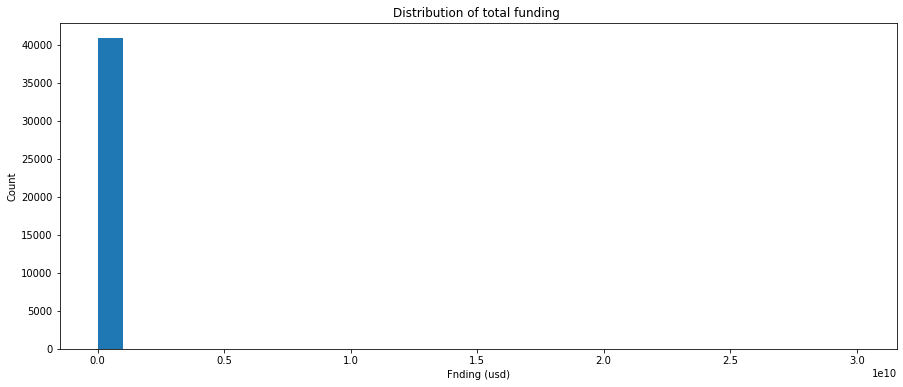

In [37]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(data['funding_total_usd'].dropna(), bins=30)
plt.ylabel('Count')
plt.xlabel('Fnding (usd)')
plt.title("Distribution of total funding ")
plt.show()

Seem like it has large gap between the highest value and the lowest, let ignore outlier first
we will use the simple remove outlier technique such as 1.5IQR

Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers). Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier

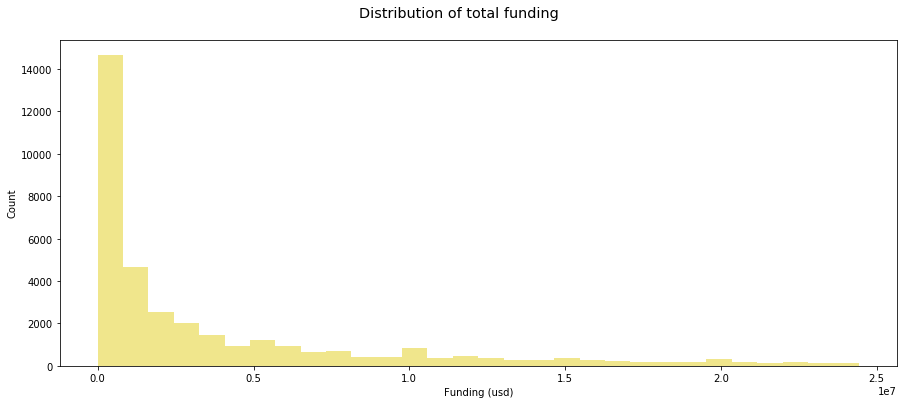

In [38]:
Q1 = data['funding_total_usd'].quantile(0.25)
Q3 = data['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
without_outlier = data[(data['funding_total_usd'] > lower_bound ) & (data['funding_total_usd'] < upper_bound)]


plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['funding_total_usd'].dropna(), bins=30,color = 'khaki' )

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

The average funding is around 15 m usd.

Let see the position of well-known company like Facebook, Alibaba, Uber but those companies are unicorn startup!!. Then, we need to move hist plot to focus only funding >= 1 billion usd

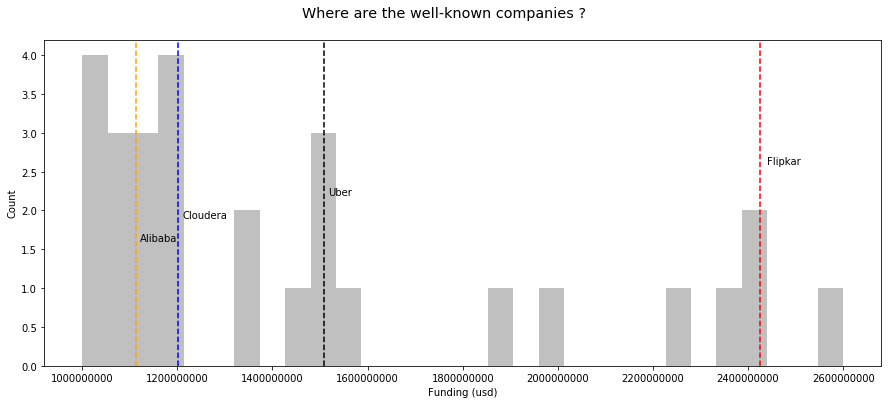

In [39]:
Facebook_total_funding = data['funding_total_usd'][data['name']=="Facebook"].values[0]
Uber_total_funding = data['funding_total_usd'][data['name']=="Uber"].values[0]
Alibaba_total_funding = data['funding_total_usd'][data['name']=="Alibaba"].values[0]
Cloudera_total_funding = data['funding_total_usd'][data['name']=="Cloudera"].values[0]
Flipkart_total_funding = data['funding_total_usd'][data['name']=="Flipkart"].values[0]


plt.rcParams['figure.figsize'] = 15,6

plt.hist(data['funding_total_usd'][(data['funding_total_usd'] >= 1000000000)&(data['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'silver' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='red',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Flipkar")
#plt.text(Facebook_total_funding+15000000, 2.6,"Flipkar")TO PRINT FLIPKART

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(Cloudera_total_funding,color='blue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")
plt.ticklabel_format(style='plain')



plt.show()


But..., Are they the highest funding ? the answer is no

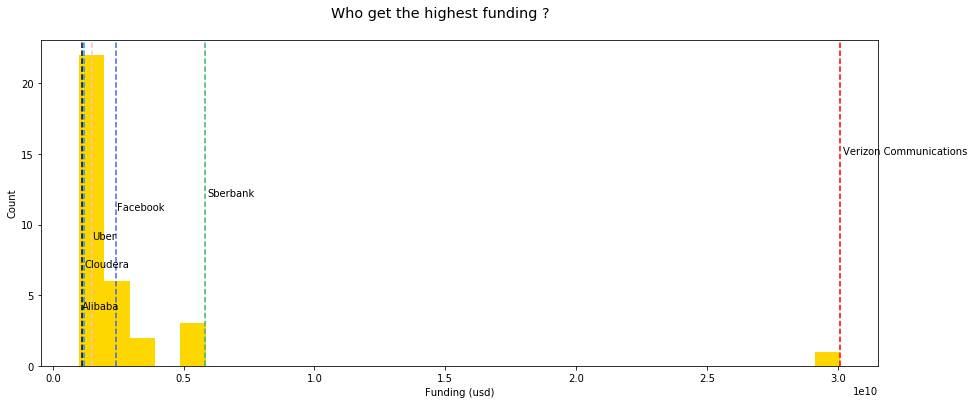

In [40]:
Verizon_total_funding = data['funding_total_usd'][data['name']=="Verizon Communications"].values[0]
Sberbank_total_funding = data['funding_total_usd'][data['name']=="Sberbank"].values[0]

plt.rcParams['figure.figsize'] = 15,6
plt.hist(data['funding_total_usd'][(data['funding_total_usd'] >= 1000000000)].dropna(), bins=30,color = 'gold' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Who get the highest funding ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 11,"Facebook")

plt.axvline(Uber_total_funding,color='pink',linestyle ="--")
plt.text(Uber_total_funding+10000000, 9,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 7,"Cloudera")

plt.axvline(Alibaba_total_funding,color='k',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 4,"Alibaba")

plt.axvline(Verizon_total_funding,color='red',linestyle ="--")
plt.text(Verizon_total_funding+100000000, 15,"Verizon Communications")

plt.axvline(Sberbank_total_funding,color='mediumseagreen',linestyle ="--")
plt.text(Sberbank_total_funding+100000000, 12,"Sberbank")

plt.show()

The most funding company in this dataset is "Verizon communication" which has total fund around 30,000,000,000 usd

##### Found at

In [41]:
data['founded_at'].head()

0    01-06-2012
1           NaN
2    26-10-2012
3    01-04-2011
4    01-01-2014
Name: founded_at, dtype: object

This column is provided in term of string format which we need to convert to datetime first

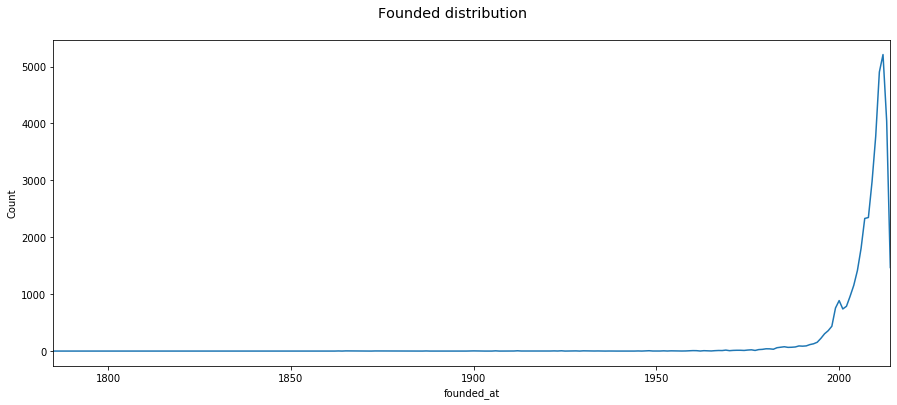

In [42]:
data['founded_at'] = pd.to_datetime(data['founded_at'], errors = 'coerce' )
plt.rcParams['figure.figsize'] = 15,6
data['name'].groupby(data["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [43]:
Facebook_founded_year = data['founded_at'][data['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = data['founded_at'][data['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = data['founded_at'][data['name']=="Alibaba"].dt.year.values[0]
Flipkart_founded_year=data['founded_at'][data['name']=="Flipkart"].dt.year.values[0]

In [44]:
Uber_founded_year

2009

In [45]:
Flipkart_founded_year


2007

In [46]:
Alibaba_founded_year

1999

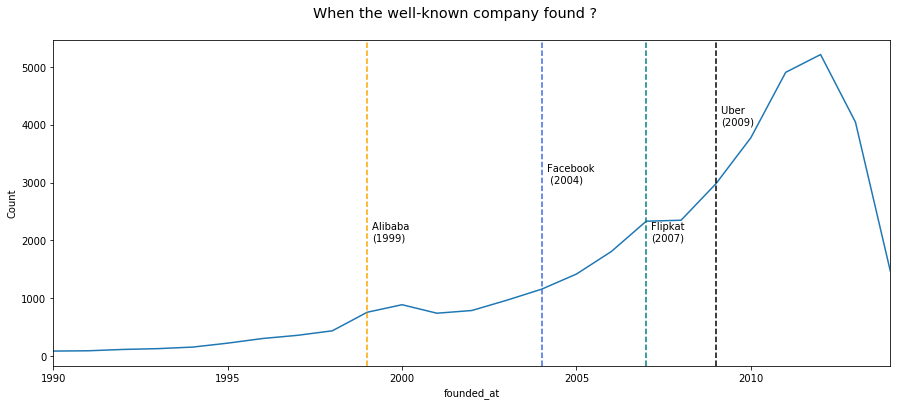

In [47]:
plt.rcParams['figure.figsize'] = 15,6
data['name'][data["founded_at"].dt.year >= 1990].groupby(data["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")

plt.axvline(Flipkart_founded_year,color='teal',linestyle ="--")
plt.text(Flipkart_founded_year+0.15, 2000,"Flipkat \n(2007)")

plt.title("When the well-known company found ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

##### Funding Analysis

In [48]:
funding_information(data,"Dropbox")

Company :  Dropbox
Total Funding :  1107215000.0  $
Seed Funding :  15000  $
Angle Funding : 0  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  500000000  $
Private Equity :  0  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  607200000  $
Round A funding :  7200000  $
Round B funding :  250000000  $
Round C funding :  350000000  $
Round D funding :  0  $
Round E funding :  0  $
Round F funding :  0  $
Round G funding :  0  $
Round H funding :  0  $


In [49]:
funding_information(data,"Flipkart")

Company :  Flipkart
Total Funding :  2351140000.0  $
Seed Funding :  0  $
Angle Funding : 140000  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  0  $
Private Equity :  0  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  2351000000  $
Round A funding :  1000000  $
Round B funding :  10000000  $
Round C funding :  20000000  $
Round D funding :  150000000  $
Round E funding :  360000000  $
Round F funding :  210000000  $
Round G funding :  1000000000  $
Round H funding :  600000000  $


In [50]:
funding_information(data,"Facebook")

Company :  Facebook
Total Funding :  2425700000.0  $
Seed Funding :  0  $
Angle Funding : 500000  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  100000000  $
Private Equity :  1710000000  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  615200000  $
Round A funding :  12700000  $
Round B funding :  27500000  $
Round C funding :  375000000  $
Round D funding :  200000000  $
Round E funding :  0  $
Round F funding :  0  $
Round G funding :  0  $
Round H funding :  0  $


###### Seed funding

Seed funding is the first official equity funding stage. It typically represents the first official money that a business venture or enterprise raises; some companies never extend beyond seed funding into Series A rounds or beyond.

There are other types of funding rounds available to startups, depending upon the industry and the level of interest among potential investors. It's not uncommon for startups to engage in what is known as "seed" funding or angel investor funding at the outset. Next, these funding rounds can be followed by Series A, B, and C funding rounds, as well as additional efforts to earn capital as well, if appropriate. Series A, B, and C are necessary ingredients for a business that decides “bootstrapping,” or merely surviving off of the generosity of friends, family, and the depth of their own pockets, will not suffice.

In [51]:
data[['name','seed']].head(5)

,name,seed
0,#waywire,1750000
1,&TV Communications,0
2,'Rock' Your Paper,40000
3,(In)Touch Network,1500000
4,-R- Ranch and Mine,0


Average funding in this stage ? Note we need to beware when use the mean value Most of value in this column is 0, they will drag your average value down The solution is using data which is not 0 to find average

In [52]:
print("The average of seed funding stage is around ",data['seed'][data['seed'] != 0].mean(), "$")

The average of seed funding stage is around  776350.5418021533 $


How many company get funding in seed stage ?

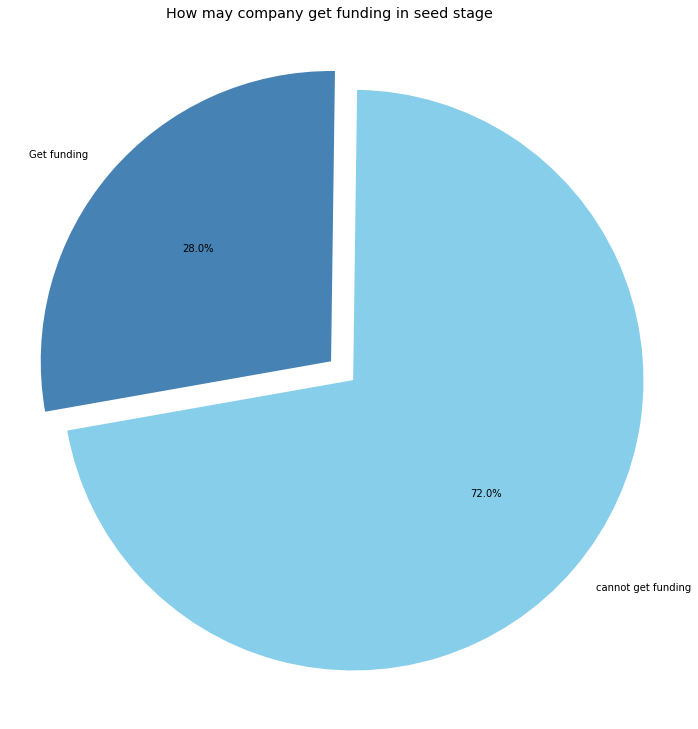

In [53]:
data['get_funding_in_seed'] = data['seed'].map(lambda s :1  if s > 0 else 0)
plt.rcParams['figure.figsize'] =10,10
labels = ['cannot get funding','Get funding']
sizes = data['get_funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['skyblue','steelblue'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How may company get funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

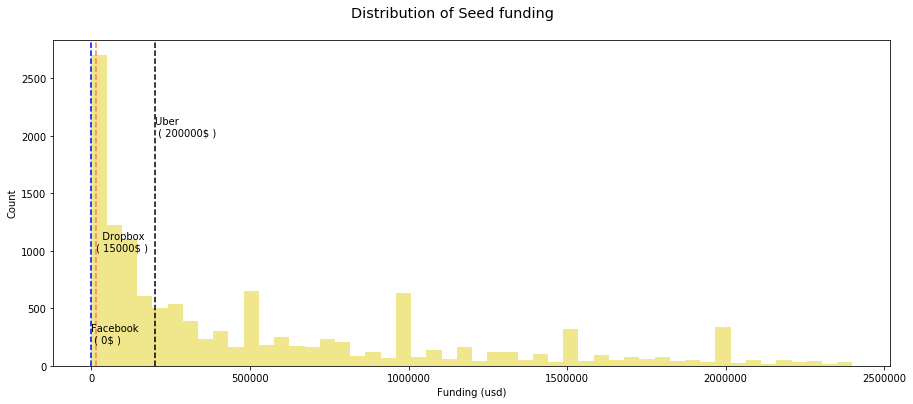

In [54]:
## Remove Outlier first 

Q1 = data['seed'][data['seed'] != 0].quantile(0.25)
Q3 = data['seed'][data['seed'] != 0].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
without_outlier = data[(data['seed'] > lower_bound ) & (data['seed'] < upper_bound)]


Facebook_seed_funding = data['seed'][data['name']=="Facebook"].values[0]
Uber_seed_funding   = data['seed'][data['name']=="Uber"].values[0]
Dropbox_seed_funding   = data['seed'][data['name']=="Dropbox"].values[0]
Flipkart_seed_funding   = data['seed'][data['name']=="Flipkart"].values[0]
Netflix_seed_funding   = data['seed'][data['name']=="Netflix"].values[0]
Alibaba_seed_funding   = data['seed'][data['name']=="Alibaba"].values[0]

plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['seed'][without_outlier['seed']!=0].dropna(), bins=50,color = 'khaki' )

plt.axvline(Facebook_seed_funding,color='blue',linestyle ="--")
plt.text(Facebook_seed_funding+0.15, 200,"Facebook \n ( 0$ )")

plt.axvline(Uber_seed_funding,color='black',linestyle ="--")
plt.text(Uber_seed_funding+0.15, 2000,"Uber \n ( 200000$ )")

plt.axvline(Dropbox_seed_funding,color='coral',linestyle ="--")
plt.text(Dropbox_seed_funding+0.15, 1000,"  Dropbox \n( 15000$ )")




plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of Seed funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

###### Angel funding
Who is angel?

An angel investor (also known as a private investor, seed investor or angel funder) is a high net worth individual who provides financial backing for small startups or entrepreneurs, typically in exchange for ownership equity in the company. Often, angel investors are found among an entrepreneur's family and friends. The funds that angel investors provide may be a one-time investment to help the business get off the ground or an ongoing injection to support and carry the company through its difficult early stages.

In [55]:
print("The average of Angel funding is around ",data['angel'][data['angel'] != 0].mean(), "$")

The average of Angel funding is around  1033615.6954298498 $


In [56]:
data['get_funding_in_angel'] = data['angel'].map(lambda s :"Get funding"  if s > 0 else "Not get funding")



print("Only " , data['get_funding_in_angel'].value_counts().values[1], " companies has angel investor")
print("while " , data['get_funding_in_angel'].value_counts().values[0], " are not")
print("~",data['get_funding_in_angel'].value_counts().values[1]/(data['get_funding_in_angel'].value_counts().values[1]
+data['get_funding_in_angel'].value_counts().values[0]) *100, "percent")

Only  3129  companies has angel investor
while  46308  are not
~ 6.329267552642757 percent


###### Investment in each round
Depending on the type of industry and investors, a funding round can take anywhere from three months to over a year. The time between each round can vary between six months to one year. Funds are offered by investors, usually angel investors or venture capital firms, which then receive a stake in the startup

In [57]:
data['round_A'][data['round_A'] != 0].mean()

6830906.178162835

In [58]:
data['round_B'][data['round_B'] != 0].mean()

13549761.864145402

In [59]:
data['round_C'][data['round_C'] != 0].mean()

21004716.314416636

In [60]:
data['round_D'][data['round_D'] != 0].mean()

28308861.312111802

In [61]:
data['round_E'][data['round_E'] != 0].mean()

32811904.83914729

In [62]:
data['round_F'][data['round_F'] != 0].mean()

48796797.72674418

In [63]:
data['round_G'][data['round_G'] != 0].mean()

83856543.3235294

In [64]:
data['round_H'][data['round_H'] != 0].mean()

175900000.0

In [65]:
data['round_H'][data['round_H'] != 0].mean()

175900000.0

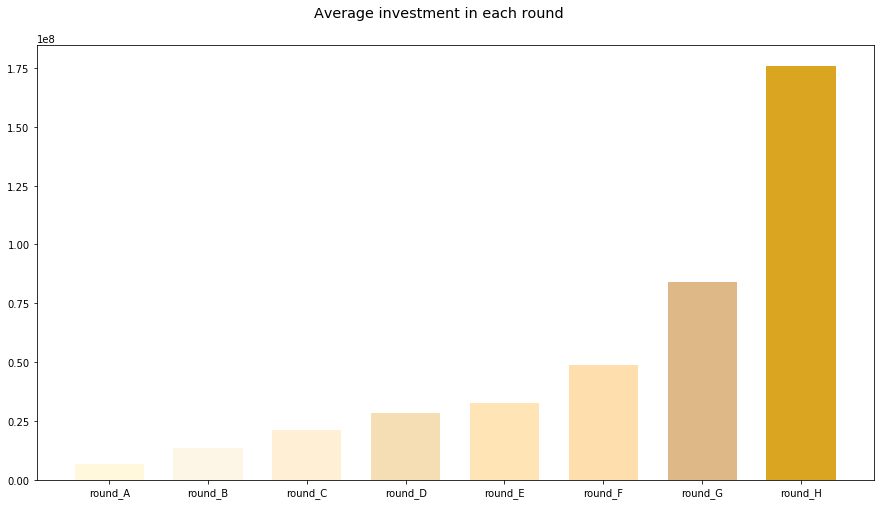

In [66]:
round = ['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']
amount = [data['round_A'][data['round_A'] != 0].mean(),
          data['round_B'][data['round_B'] != 0].mean(),
          data['round_C'][data['round_C'] != 0].mean(),
          data['round_D'][data['round_D'] != 0].mean(),
          data['round_E'][data['round_E'] != 0].mean(),
          data['round_F'][data['round_F'] != 0].mean(),
          data['round_G'][data['round_G'] != 0].mean(),
         data['round_H'][data['round_H'] != 0].mean()]



plt.rcParams['figure.figsize'] = 15,8

height = amount
bars =  round
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7, color= ['cornsilk','oldlace','papayawhip','wheat','moccasin','navajowhite','burlywood','goldenrod'] )
plt.xticks(y_pos, bars)
plt.title("Average investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

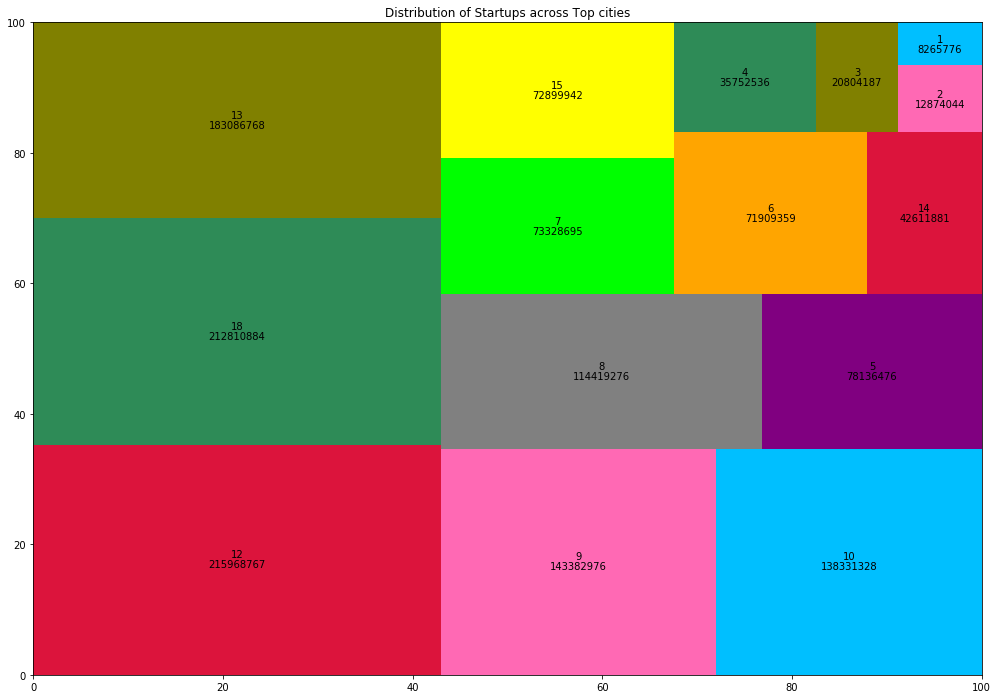

In [67]:
import squarify
plt.figure(figsize=(17,12))
mean_amount = data.groupby("funding_rounds").mean()["funding_total_usd"].astype('int').sort_values(ascending=False).iloc[1:].head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values,color=['crimson','seagreen','olive','hotpink','deepskyblue','grey','purple','lime','yellow','orange'])
plt.title('Distribution of Startups across Top cities')

total funding and founding round heat map

Text(0.5, 1.0, "Startups's,seed and angel in  india by region")

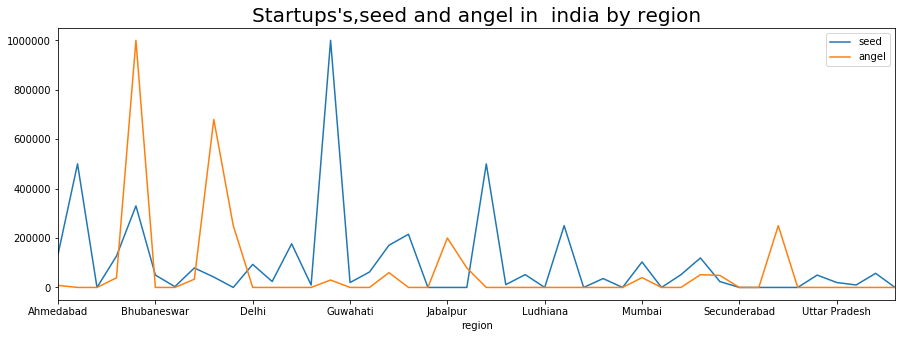

In [68]:
#The average funding from seed and angel funding in india by region

gbf=data[(data['country_code'] == 'IND')]
rg= gbf.groupby('region').mean()
fr=rg.plot(kind ='line', y=['seed','angel'], figsize=(15,5))

fr.set_title('Startups\'s,seed and angel in  india by region',fontsize=(20))

Text(0.5, 1.0, "Startups's,e funding from seed and angel in india by market in  india by market")

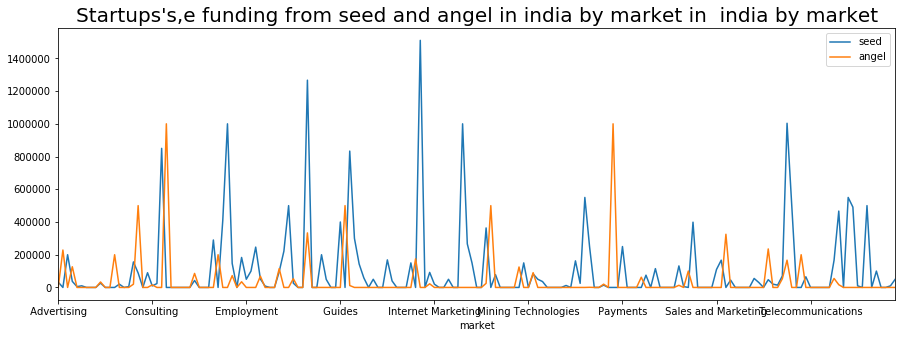

In [69]:
#The average funding from seed and angel in india by market

gbf=data[(data['country_code'] == 'IND')]
rg= gbf.groupby('market').mean()
fr=rg.plot(kind ='line', y=['seed','angel'], figsize=(15,5))

fr.set_title('Startups\'s,e funding from seed and angel in india by market in  india by market',fontsize=(20))

###### Time series
A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

In [70]:
x=data[["founded_year", "seed","venture"]]
x.head()

,founded_year,seed,venture
0,2012.00,1750000,0
1,nan,0,4000000
2,2012.00,40000,0
3,2011.00,1500000,0
4,2014.00,0,0


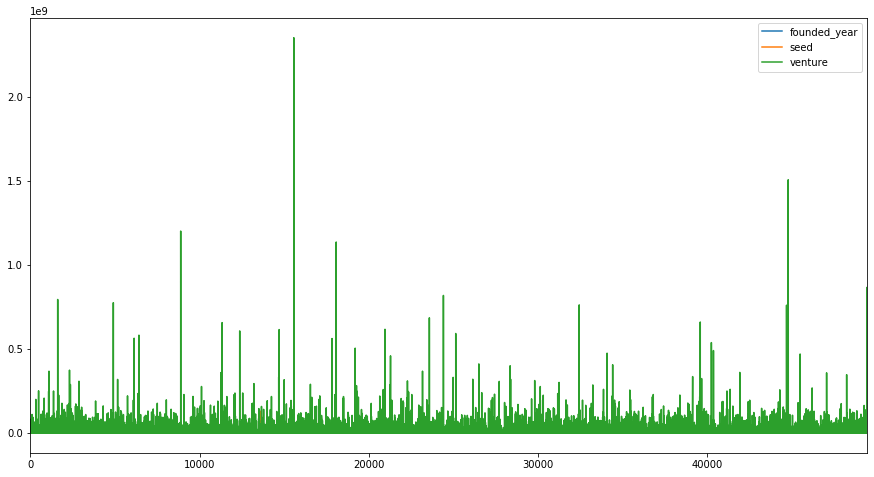

In [71]:
x.plot()
plt.show()

In [72]:
data['founded_at'] = pd.to_datetime(data['founded_at'], errors = 'coerce' )

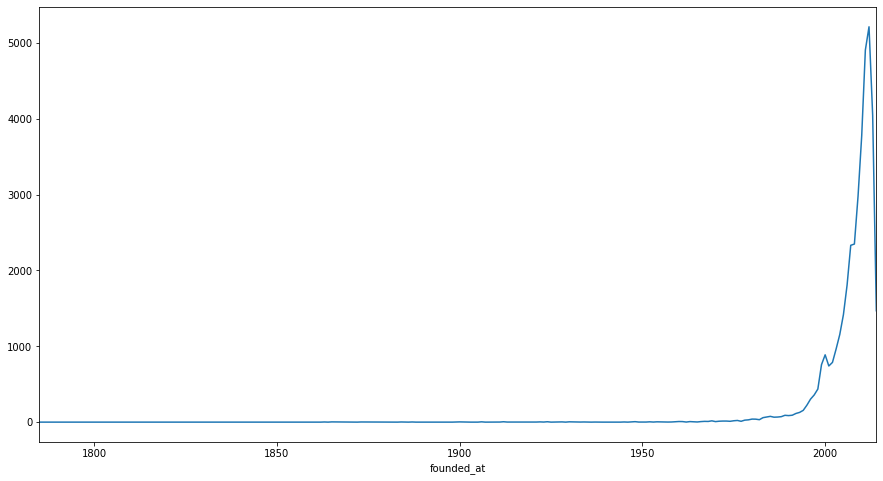

In [73]:
data['seed'].groupby(data["founded_at"].dt.year).count().plot(kind="line")

In [74]:
data['seed_YN'] = ['yes' if x>0 else 'no' for x in data['seed']]
data['venture_YN'] = ['yes' if x>0 else 'no' for x in data['venture']]
g=data.groupby('seed_YN')
print(g.groups)
group_seed=pd.DataFrame(g.get_group('yes'))
group_seed

{'no': Int64Index([    1,     4,     5,     6,     7,     8,    11,    12,    13,
               14,
            ...
            49423, 49424, 49425, 49426, 49427, 49429, 49430, 49432, 49434,
            49437],
           dtype='int64', length=35598), 'yes': Int64Index([    0,     2,     3,     9,    10,    15,    17,    18,    20,
               22,
            ...
            49396, 49398, 49400, 49407, 49413, 49428, 49431, 49433, 49435,
            49436],
           dtype='int64', length=13839)}


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_D,round_E,round_F,round_G,round_H,count,get_funding_in_seed,get_funding_in_angel,seed_YN,venture_YN
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,...,0,0,0,0,0,1,1,Not get funding,yes,no
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.00,operating,EST,NaN,Tallinn,...,0,0,0,0,0,1,1,Not get funding,yes,no
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.00,operating,GBR,NaN,London,...,0,0,0,0,0,1,1,Not get funding,yes,no
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,41250.00,operating,HKG,NaN,Hong Kong,...,0,0,0,0,0,1,1,Not get funding,yes,no
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,40000.00,operating,CHL,NaN,Santiago,...,0,0,0,0,0,1,1,Not get funding,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49428,/organization/zynstra,Zynstra,http://www.zynstra.com,|Software|,Software,14750000.00,operating,GBR,NaN,Bath,...,0,0,0,0,0,1,1,Get funding,yes,yes
49431,/organization/zyrra,Zyrra,http://www.zyrra.com,|E-Commerce|,E-Commerce,1510500.00,operating,USA,MA,Boston,...,0,0,0,0,0,1,1,Get funding,yes,yes
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.00,operating,GBR,NaN,London,...,0,0,0,0,0,1,1,Not get funding,yes,no
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398.00,operating,HRV,NaN,Split,...,0,0,0,0,0,1,1,Not get funding,yes,no


In [75]:
g1=data.groupby('venture_YN')
print(g1.groups)
group_venture=g1.get_group('yes')
group_venture

{'no': Int64Index([    0,     2,     3,     4,     6,     8,     9,    10,    11,
               12,
            ...
            49411, 49413, 49414, 49418, 49421, 49422, 49423, 49433, 49435,
            49436],
           dtype='int64', length=26160), 'yes': Int64Index([    1,     5,     7,    15,    20,    21,    22,    23,    24,
               25,
            ...
            49425, 49426, 49427, 49428, 49429, 49430, 49431, 49432, 49434,
            49437],
           dtype='int64', length=23277)}


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_D,round_E,round_F,round_G,round_H,count,get_funding_in_seed,get_funding_in_angel,seed_YN,venture_YN
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.00,operating,USA,CA,Los Angeles,...,0,0,0,0,0,1,0,Not get funding,no,yes
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,7000000.00,NaN,USA,FL,Ft. Lauderdale,...,0,0,0,0,0,1,0,Not get funding,no,yes
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000.00,operating,NaN,NaN,NaN,...,0,0,0,0,0,1,0,Not get funding,no,yes
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,|Education|,Education,4400000.00,operating,GBR,NaN,London,...,0,0,0,0,0,1,1,Not get funding,yes,yes
20,/organization/1000memories,1000memories,http://1000memories.com,|Curated Web|,Curated Web,2535000.00,acquired,USA,CA,SF Bay Area,...,0,0,0,0,0,1,1,Not get funding,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,15419877.00,closed,MYS,NaN,MYS - Other,...,0,0,0,0,0,1,0,Get funding,no,yes
49431,/organization/zyrra,Zyrra,http://www.zyrra.com,|E-Commerce|,E-Commerce,1510500.00,operating,USA,MA,Boston,...,0,0,0,0,0,1,1,Get funding,yes,yes
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600.00,operating,AUT,NaN,Vienna,...,0,0,0,0,0,1,0,Not get funding,no,yes
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301.00,operating,CHN,NaN,Beijing,...,0,0,0,0,0,1,0,Not get funding,no,yes


In [76]:
datas=group_seed[['founded_year', 'seed_YN']]
datas.head()

,founded_year,seed_YN
0,2012.00,yes
2,2012.00,yes
3,2011.00,yes
9,nan,yes
10,2012.00,yes


In [77]:
datsa= datas.groupby(['founded_year'])['seed_YN'].count()
datas

,founded_year,seed_YN
0,2012.00,yes
2,2012.00,yes
3,2011.00,yes
9,nan,yes
10,2012.00,yes
...,...,...
49428,2011.00,yes
49431,nan,yes
49433,2013.00,yes
49435,2012.00,yes


In [78]:
datav=group_venture[['founded_year', 'venture_YN']]
datav.head()

,founded_year,venture_YN
1,nan,yes
5,2011.00,yes
7,2007.00,yes
15,2013.00,yes
20,2010.00,yes


In [79]:
datav = datav.groupby(['founded_year'])['venture_YN'].count()
#datav.sort_values(ascending=False)
datav

founded_year
1902.00       1
1906.00       4
1913.00       1
1919.00       1
1921.00       2
           ... 
2010.00    1646
2011.00    1676
2012.00    1350
2013.00     687
2014.00     116
Name: venture_YN, Length: 77, dtype: int64

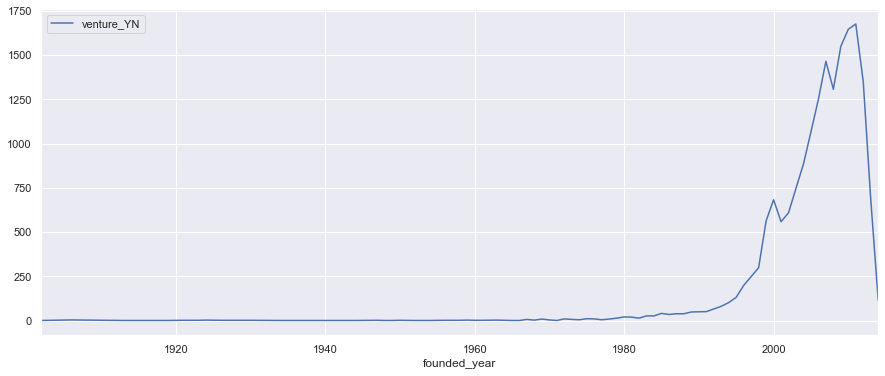

In [80]:
#final = data.apply(pd.value_counts).fillna(0)
#final
datas=pd.DataFrame(datas)
datav=pd.DataFrame(datav)
sns.set()
plt.rcParams['figure.figsize'] = 15,6
datav.plot()

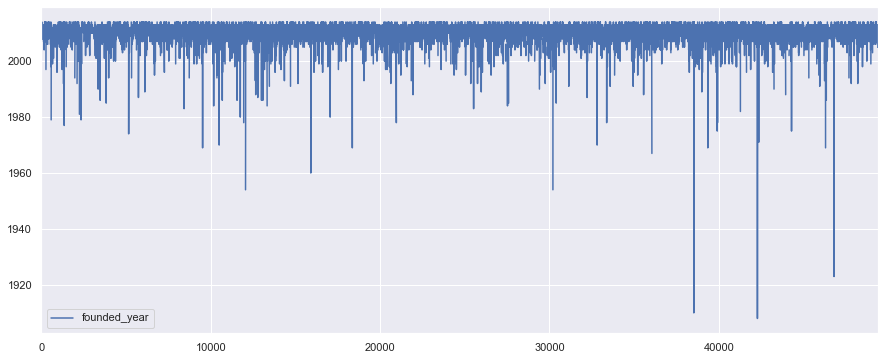

In [81]:
plt.rcParams['figure.figsize'] = 15,6
datas.plot()

In [82]:
dataset=data[["name","seed","venture","angel","grant","seed_YN","venture_YN"]]
dataset.head()


,name,seed,venture,angel,grant,seed_YN,venture_YN
0,#waywire,1750000,0,0,0,yes,no
1,&TV Communications,0,4000000,0,0,no,yes
2,'Rock' Your Paper,40000,0,0,0,yes,no
3,(In)Touch Network,1500000,0,0,0,yes,no
4,-R- Ranch and Mine,0,0,0,0,no,no


In [83]:
dataset=data[["name","seed","venture","angel","grant","seed_YN","venture_YN"]]
dataset.head()


,name,seed,venture,angel,grant,seed_YN,venture_YN
0,#waywire,1750000,0,0,0,yes,no
1,&TV Communications,0,4000000,0,0,no,yes
2,'Rock' Your Paper,40000,0,0,0,yes,no
3,(In)Touch Network,1500000,0,0,0,yes,no
4,-R- Ranch and Mine,0,0,0,0,no,no


In [84]:
angel='angel',len(dataset['angel'][dataset['angel'] != 0])
venture="venture",len(dataset['venture'][dataset['venture'] != 0])
seed="seed",len(dataset['seed'][dataset['seed'] != 0])
grant="grant",len(dataset['grant'][dataset['grant'] != 0])
equity_crowdfunding="equity_crowdfunding",len(data['equity_crowdfunding'][data['equity_crowdfunding'] != 0])
print(angel,venture,seed,grant,equity_crowdfunding)

datat = {'funding_types':['angel','venture','seed','grant','equity_crowdfunding'], 
                                             'count':[3129, 23277, 13840, 1142, 517],
                                             "closed":[ 264, 1164,  771,   36,    0],
                                             "acquired":[ 188, 2580,  591,   33,    4],
                                             "operating":[ 2627, 19030, 12072,   996,   513]}
       
funding_count = pd.DataFrame(datat) 
  

funding_count



('angel', 3129) ('venture', 23277) ('seed', 13839) ('grant', 1142) ('equity_crowdfunding', 522)


,funding_types,count,closed,acquired,operating
0,angel,3129,264,188,2627
1,venture,23277,1164,2580,19030
2,seed,13840,771,591,12072
3,grant,1142,36,33,996
4,equity_crowdfunding,517,0,4,513


Text(0, 0.5, 'count')

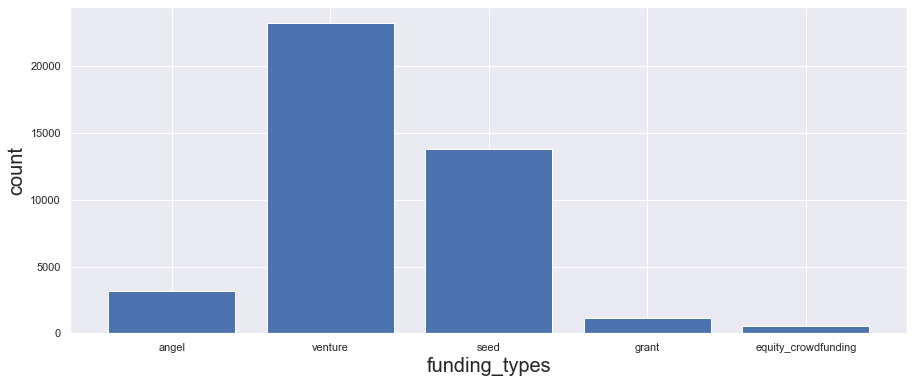

In [85]:
plt.bar(funding_count["funding_types"], funding_count['count'])
plt.xlabel("funding_types", fontsize=20)
plt.ylabel("count", fontsize=20)

Text(0, 0.5, 'Closed')

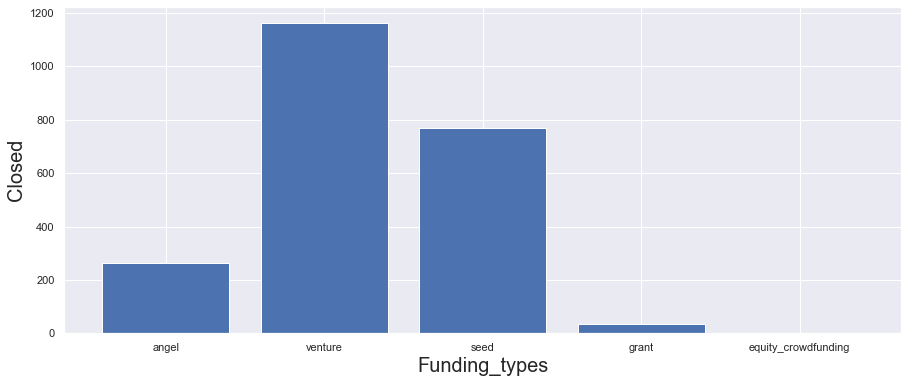

In [86]:
plt.bar(funding_count["funding_types"], funding_count['closed'])
plt.xlabel("Funding_types", fontsize=20)
plt.ylabel("Closed", fontsize=20)

Text(0, 0.5, 'Acquired')

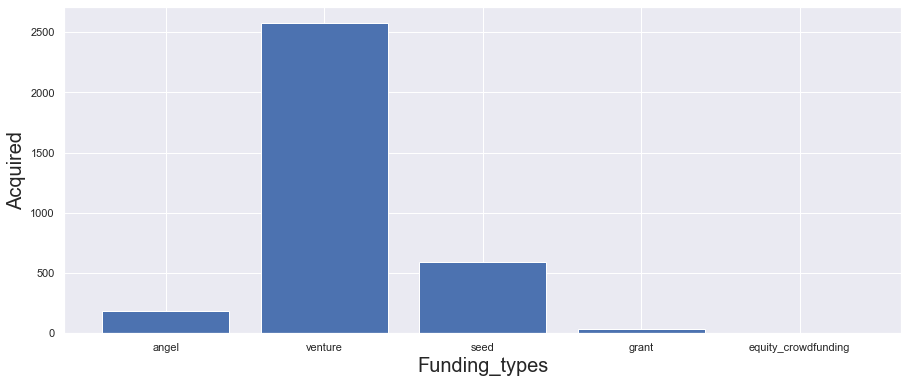

In [87]:
plt.bar(funding_count["funding_types"], funding_count['acquired'])
plt.xlabel("Funding_types", fontsize=20)
plt.ylabel("Acquired", fontsize=20)

Text(0, 0.5, 'Operating')

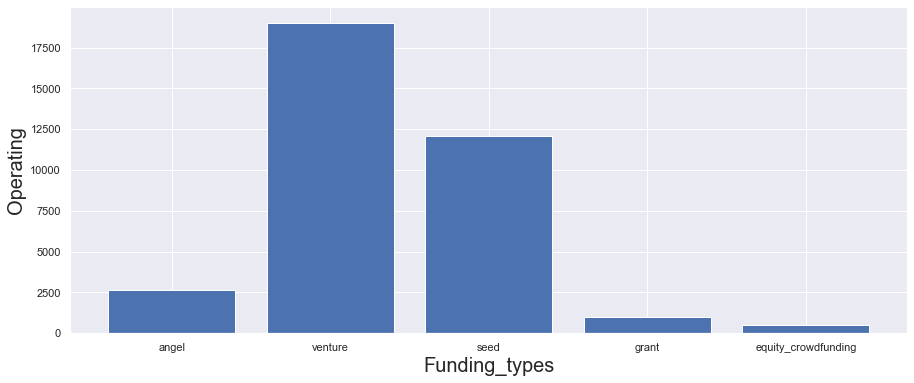

In [88]:
plt.bar(funding_count["funding_types"], funding_count['operating'])
plt.xlabel("Funding_types", fontsize=20)
plt.ylabel("Operating", fontsize=20)

In [89]:
data["status"].value_counts()
corr_matrix = data.corr()
corr_matrix

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,count,get_funding_in_seed
funding_total_usd,1.00,0.11,-0.07,-0.00,0.21,-0.00,0.02,0.01,0.90,0.00,...,0.06,0.10,0.13,0.12,0.11,0.09,0.08,0.07,nan,-0.05
funding_rounds,0.11,1.00,-0.06,0.09,0.40,-0.00,0.03,0.02,0.02,0.06,...,0.17,0.28,0.30,0.20,0.20,0.10,0.06,0.04,nan,0.03
founded_year,-0.07,-0.06,1.00,0.08,-0.09,0.01,-0.04,-0.01,-0.03,0.02,...,-0.02,-0.04,-0.05,-0.03,-0.03,-0.01,-0.00,-0.00,nan,0.27
seed,-0.00,0.09,0.08,1.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.01,0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,nan,0.33
venture,0.21,0.40,-0.09,-0.01,1.00,-0.01,0.01,0.00,0.01,0.01,...,0.33,0.50,0.58,0.59,0.53,0.43,0.42,0.37,nan,-0.12
equity_crowdfunding,-0.00,-0.00,0.01,-0.00,-0.01,1.00,-0.00,-0.00,-0.00,0.02,...,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.01
undisclosed,0.02,0.03,-0.04,-0.00,0.01,-0.00,1.00,-0.00,-0.00,0.00,...,0.00,-0.00,0.00,0.00,0.03,-0.00,-0.00,-0.00,nan,-0.02
convertible_note,0.01,0.02,-0.01,-0.00,0.00,-0.00,-0.00,1.00,0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,nan,-0.01
debt_financing,0.90,0.02,-0.03,-0.00,0.01,-0.00,-0.00,0.00,1.00,-0.00,...,-0.00,0.01,0.01,0.00,0.01,0.01,0.00,-0.00,nan,-0.01
angel,0.00,0.06,0.02,-0.00,0.01,0.02,0.00,-0.00,-0.00,1.00,...,0.02,0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,nan,-0.02


In [90]:
corr_matrix["venture"].sort_values(ascending=False)

venture                1.00
round_D                0.59
round_C                0.58
round_E                0.53
round_B                0.50
round_F                0.43
round_G                0.42
funding_rounds         0.40
round_H                0.37
round_A                0.33
funding_total_usd      0.21
secondary_market       0.06
private_equity         0.06
post_ipo_equity        0.01
undisclosed            0.01
debt_financing         0.01
grant                  0.01
angel                  0.01
convertible_note       0.00
post_ipo_debt         -0.00
equity_crowdfunding   -0.01
seed                  -0.01
founded_year          -0.09
get_funding_in_seed   -0.12
count                   nan
Name: venture, dtype: float64

# ML Models

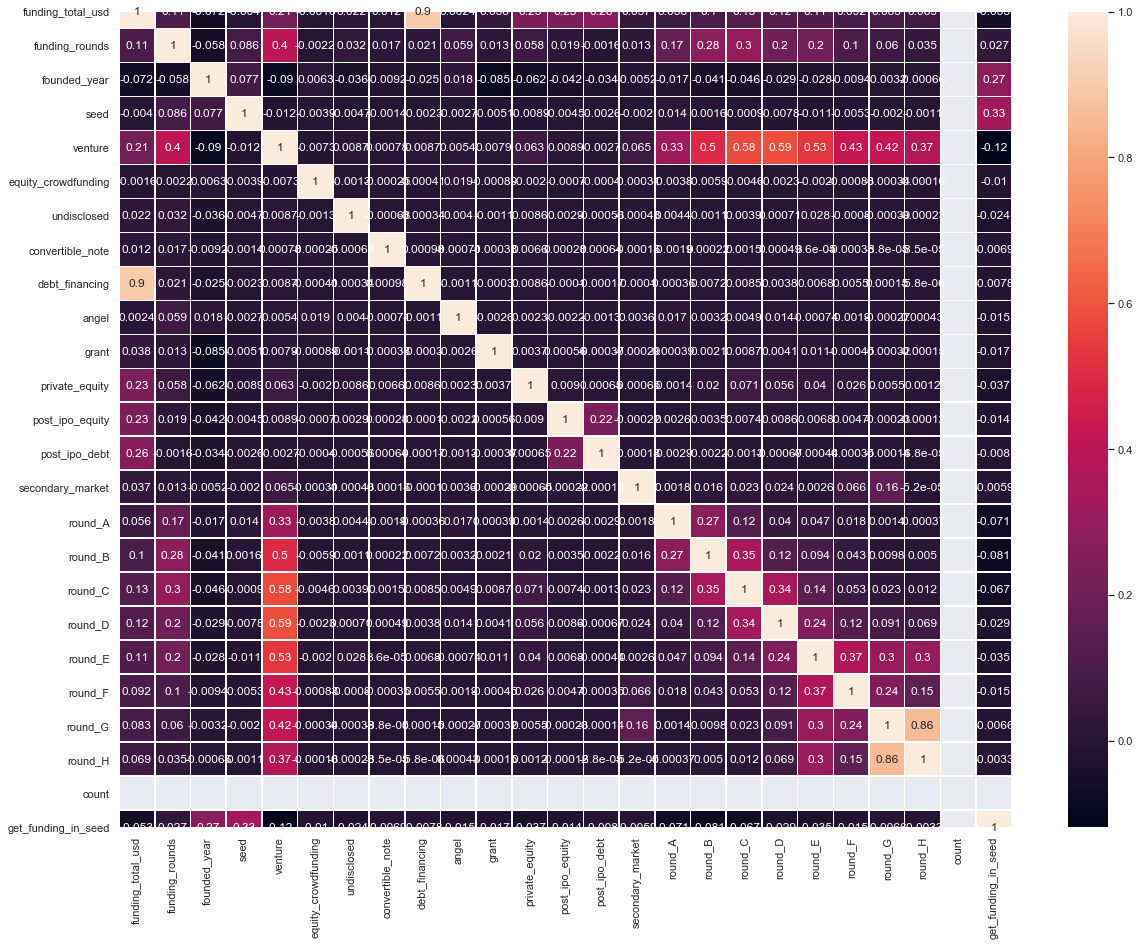

In [91]:
plt.subplots(figsize=(20,15))

sns.heatmap(data.corr(), annot=True, linewidth=0.5);

In [92]:
import sklearn.metrics as metrics
linearRegressor = LinearRegression()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import utils
import graphviz
from sklearn.ensemble import IsolationForest

In [93]:
df=data

In [94]:
df_status = pd.get_dummies(df["status"],drop_first=True,prefix='s')

In [95]:
df_concat = pd.concat([df, df_status], axis=1)
print (df_concat.head())

                         permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list         market  \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   fund

In [96]:
df_concat.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_F,round_G,round_H,count,get_funding_in_seed,get_funding_in_angel,seed_YN,venture_YN,s_closed,s_operating
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,...,0,0,0,1,1,Not get funding,yes,no,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.00,operating,USA,CA,Los Angeles,...,0,0,0,1,0,Not get funding,no,yes,0,1
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.00,operating,EST,NaN,Tallinn,...,0,0,0,1,1,Not get funding,yes,no,0,1
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.00,operating,GBR,NaN,London,...,0,0,0,1,1,Not get funding,yes,no,0,1
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,...,0,0,0,1,0,Not get funding,no,no,0,1


In [97]:
df_concat[["s_closed","s_operating"]].isnull
#df_concat.fillna(method='bfill')

<bound method DataFrame.isnull of        s_closed  s_operating
0             0            0
1             0            1
2             0            1
3             0            1
4             0            1
...         ...          ...
49433         0            1
49434         0            1
49435         0            1
49436         0            1
49437         0            1

[49437 rows x 2 columns]>

here we have converted Status to a catagorial values 

Now we are using Decision tree to see is there any relation between funding and operating status

In [98]:
xt=df_concat[["s_closed","s_operating"]]#.values.reshape(-1,1)

#xt.fillna(xt.mean())

In [99]:
yt=data["funding_total_usd"]#.values.reshape(-1,1)
#yt.fillna(yt.mean())

In [100]:
X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.3)
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [101]:
X_test.fillna(X_test.mean(),inplace=True)
y_test.fillna(y_test.mean(),inplace=True)
X_train.fillna(X_train.mean(),inplace=True)
y_train.fillna(y_train.mean(),inplace=True)

In [102]:
lab_enc = preprocessing.LabelEncoder()
ytrain = lab_enc.fit_transform(y_train)
print(ytrain)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(ytrain))


[7391 7964 7964 ... 7964 7890 7964]
continuous
multiclass
multiclass


In [103]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [104]:
clf.fit(X_train,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(502.20000000000005, 271.8, 'X[1] <= 0.5\nentropy = 9.668\nsamples = 34605\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(334.8, 163.08, 'X[0] <= 0.5\nentropy = 8.772\nsamples = 5260\nvalue = [0, 0, 0 ... 1, 0, 0]'),
 Text(167.4, 54.360000000000014, 'entropy = 8.811\nsamples = 3472\nvalue = [0, 0, 0 ... 1, 0, 0]'),
 Text(502.20000000000005, 54.360000000000014, 'entropy = 7.566\nsamples = 1788\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(669.6, 163.08, 'entropy = 9.596\nsamples = 29345\nvalue = [1, 1, 1 ... 0, 1, 1]')]

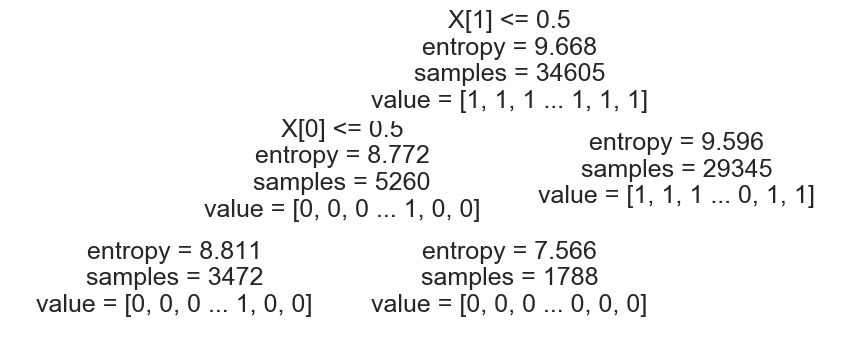

In [105]:
tree.plot_tree(clf)

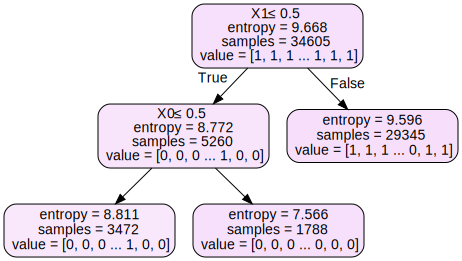

In [106]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [107]:
y_pred=clf.predict(X_test)
#clf.score(X_test, y_test)

AS we can see tree does classify on the basis of total funding and operating

In [126]:
xt=df_concat[["s_closed","s_operating"]]

In [133]:
yt=data[["funding_rounds","funding_total_usd"]]

[Text(502.20000000000005, 271.8, 'X[1] <= 0.5\nentropy = 9.668\nsamples = 34605\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(334.8, 163.08, 'X[0] <= 0.5\nentropy = 8.76\nsamples = 5241\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(167.4, 54.360000000000014, 'entropy = 8.575\nsamples = 3472\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(502.20000000000005, 54.360000000000014, 'entropy = 8.043\nsamples = 1769\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(669.6, 163.08, 'entropy = 9.599\nsamples = 29364\nvalue = [1, 1, 1 ... 1, 1, 1]')]

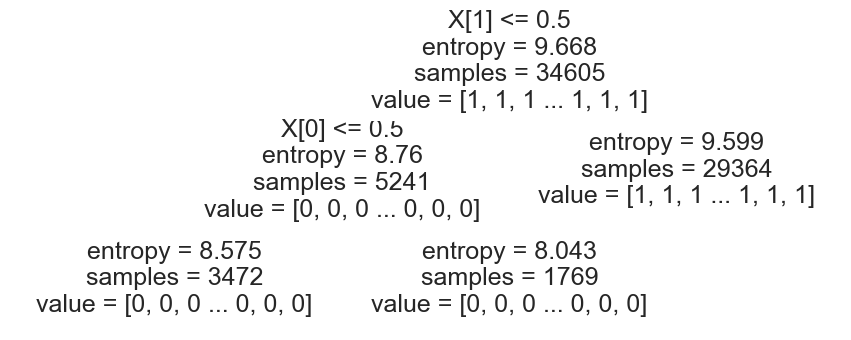

In [134]:
X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.3)
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,ytrain)
tree.plot_tree(clf)

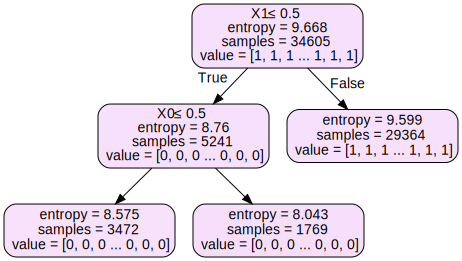

In [135]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [136]:
#clf.score(X_test, y_test)

now we have created tree based on funding round and operating status and total amount of funding

In [108]:
ytt=data["funding_rounds"]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(xt, ytt, test_size = 0.3)

In [110]:
clf.fit(X_train,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(502.20000000000005, 271.8, 'X[1] <= 0.5\nentropy = 9.668\nsamples = 34605\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(334.8, 163.08, 'X[0] <= 0.5\nentropy = 8.748\nsamples = 5290\nvalue = [1, 1, 1 ... 0, 0, 0]'),
 Text(167.4, 54.360000000000014, 'entropy = 8.462\nsamples = 3475\nvalue = [0, 1, 0 ... 0, 0, 0]'),
 Text(502.20000000000005, 54.360000000000014, 'entropy = 8.205\nsamples = 1815\nvalue = [1, 0, 1 ... 0, 0, 0]'),
 Text(669.6, 163.08, 'entropy = 9.6\nsamples = 29315\nvalue = [0, 0, 0 ... 1, 1, 1]')]

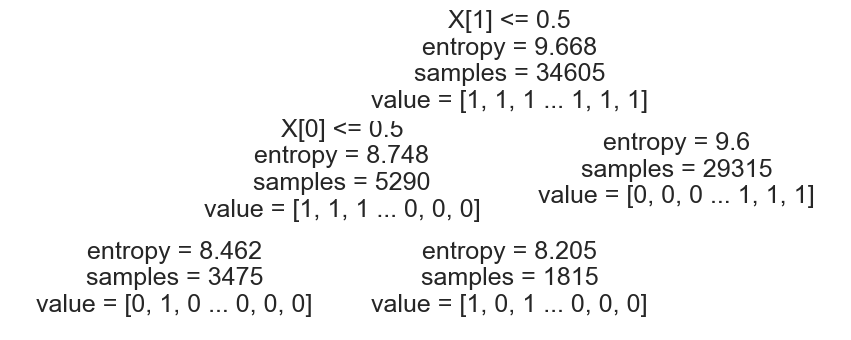

In [111]:
tree.plot_tree(clf)

In [112]:
y_pred=clf.predict(X_test)

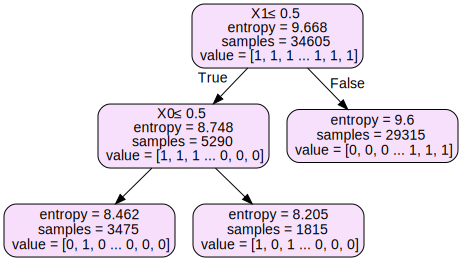

In [113]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

The above fig shows tree diagram for funding round and operating status

In [115]:

y=data["round_C"].values.reshape(-1,1)
x=data["venture"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15362
       76265       0.00      0.00      0.00         1
      225417       0.00      0.00      0.00         1
      272745       0.00      0.00      0.00         1
      303757       0.00      0.00      0.00         1
      440000       0.00      0.00      0.00         1
      450000       0.00      0.00      0.00         1
      500000       0.00      0.00      0.00         3
      506919       0.00      0.00      0.00         1
      532850       0.00      0.00      0.00         1
      687500       0.00      0.00      0.00         1
      785000       0.00      0.00      0.00         1
      800000       0.00      0.00      0.00         1
      825000       0.00      0.00      0.00         1
      925000       0.00      0.00      0.00         1
     1000000       0.00      0.00      0.00         6
     1148040       0.00      0.00      0.00         1
     1200000       0.00    

veture funding and round c funding are similar but they are not the same , so we have used logisctics regression to classify 

In [116]:
labelencoder = LabelEncoder()
data["market"]=data['market'].astype('category')
#data["market"]=data['market'].astype('category')
data['market_Cat'] = data['market'].cat.codes
data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_E,round_F,round_G,round_H,count,get_funding_in_seed,get_funding_in_angel,seed_YN,venture_YN,market_Cat
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,...,0,0,0,0,1,1,Not get funding,yes,no,465
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.00,operating,USA,CA,Los Angeles,...,0,0,0,0,1,0,Not get funding,no,yes,277
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.00,operating,EST,NaN,Tallinn,...,0,0,0,0,1,1,Not get funding,yes,no,543
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.00,operating,GBR,NaN,London,...,0,0,0,0,1,1,Not get funding,yes,no,211
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,...,0,0,0,0,1,0,Not get funding,no,no,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.00,operating,GBR,NaN,London,...,0,0,0,0,1,1,Not get funding,yes,no,205
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301.00,operating,CHN,NaN,Beijing,...,0,0,0,0,1,0,Not get funding,no,yes,233
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398.00,operating,HRV,NaN,Split,...,0,0,0,0,1,1,Not get funding,yes,no,732
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,9300000.00,operating,NaN,NaN,NaN,...,0,0,0,0,1,1,Not get funding,yes,no,277


In [117]:
data["country_code"]=data['country_code'].astype('category')
data['ccountry_code_cat'] = data['country_code'].cat.codes
data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,round_F,round_G,round_H,count,get_funding_in_seed,get_funding_in_angel,seed_YN,venture_YN,market_Cat,ccountry_code_cat
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,...,0,0,0,1,1,Not get funding,yes,no,465,110
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.00,operating,USA,CA,Los Angeles,...,0,0,0,1,0,Not get funding,no,yes,277,110
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.00,operating,EST,NaN,Tallinn,...,0,0,0,1,1,Not get funding,yes,no,543,35
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.00,operating,GBR,NaN,London,...,0,0,0,1,1,Not get funding,yes,no,211,38
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,...,0,0,0,1,0,Not get funding,no,no,683,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.00,operating,GBR,NaN,London,...,0,0,0,1,1,Not get funding,yes,no,205,38
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301.00,operating,CHN,NaN,Beijing,...,0,0,0,1,0,Not get funding,no,yes,233,20
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398.00,operating,HRV,NaN,Split,...,0,0,0,1,1,Not get funding,yes,no,732,44
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,9300000.00,operating,NaN,NaN,NaN,...,0,0,0,1,1,Not get funding,yes,no,277,-1


converting country code and market into catagorical values to form clusters

In [118]:
from sklearn.cluster import DBSCAN
M=data["market_Cat"].values.reshape(-1,1)
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(M)
distances, indices = nbrs.kneighbors(M)
clustering = DBSCAN(eps=1.5, min_samples=5).fit(M)
print(clustering.labels_)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[0 1 0 ... 3 1 2]
Estimated number of clusters: 8
Estimated number of noise points: 0


we have made cluster using density based clustering and got greate accuracy, we haved used knn to get eps value

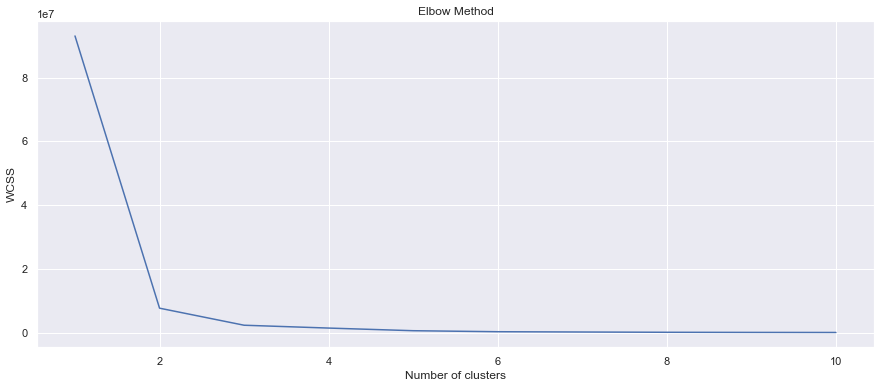

In [119]:
M=data["market_Cat"].values.reshape(-1,1)
C=data["ccountry_code_cat"].values.reshape(-1,1)


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  random_state=0)
    kmeans.fit(C)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

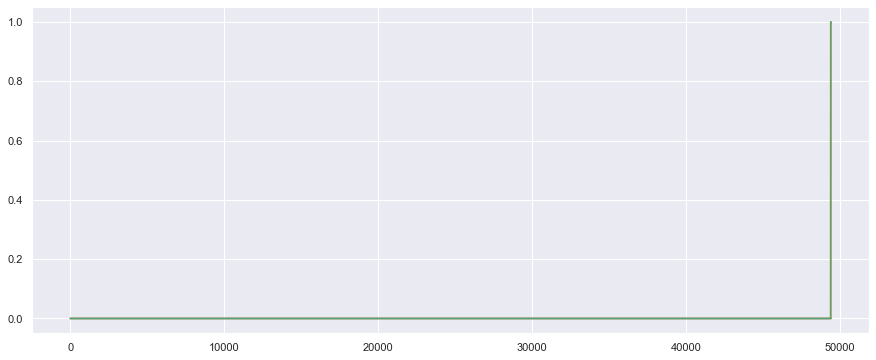

In [120]:


from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(C)
distances, indices = nbrs.kneighbors(C)
from matplotlib import pyplot as plt
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)

In [121]:
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(C)
distances, indices = nbrs.kneighbors(C)
clustering = DBSCAN(eps=0.4, min_samples=5).fit(C)
print(clustering.labels_)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[ 0  0  1 ... 49  4  0]
Estimated number of clusters: 77
Estimated number of noise points: 76


we have made clusterof city  using density based clustering and got greate accuracy, we haved used knn to get eps value

In [122]:
data["funding_total_usd"].fillna(data["funding_total_usd"].mean(),inplace=True)
data["market_Cat"].fillna(data["market_Cat"].mean(),inplace=True)

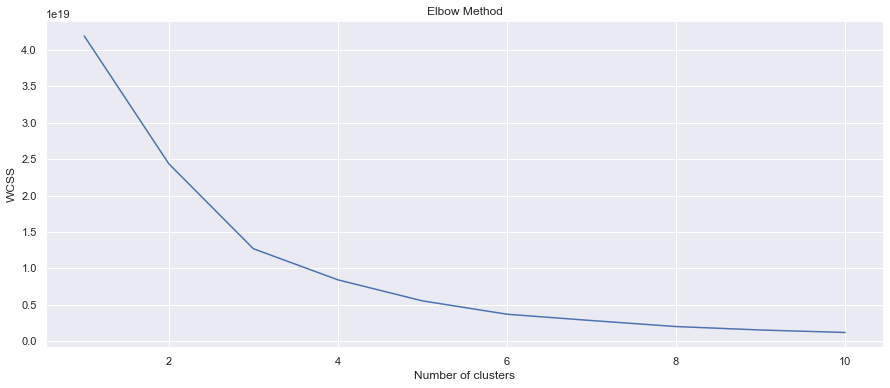

In [138]:
R=data[['seed','venture','angel']].values.reshape(-1,1)


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  random_state=0)
    kmeans.fit(R)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

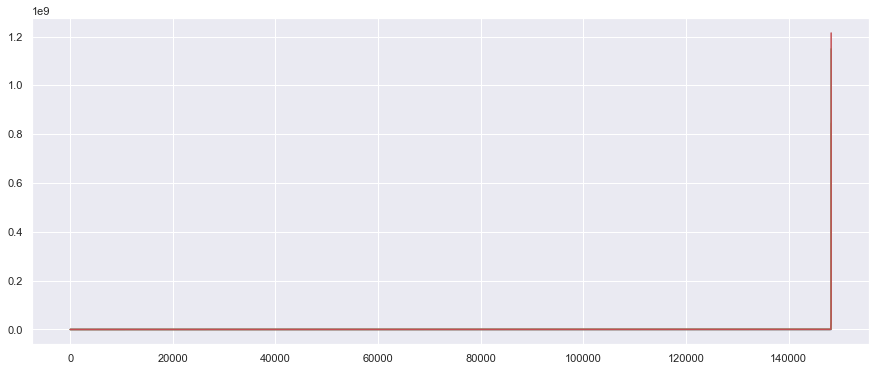

In [139]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(R)
distances, indices = nbrs.kneighbors(R)
from matplotlib import pyplot as plt
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)

MemoryError: 

In [141]:
y=data["seed"].values.reshape(-1,1)
x=data["angel"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     11790
         118       0.00      0.00      0.00         1
         150       0.00      0.00      0.00         1
         929       0.00      0.00      0.00         1
        1000       0.00      0.00      0.00        11
        1506       0.00      0.00      0.00         1
        2000       0.00      0.00      0.00         2
        2500       0.00      0.00      0.00         2
        3000       0.00      0.00      0.00         3
        3345       0.00      0.00      0.00         1
        3766       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         2
        5000       0.00      0.00      0.00        14
        5001       0.00      0.00      0.00         1
        5005       0.00      0.00      0.00         1
        6000       0.00      0.00      0.00         1
        6500       0.00      0.00      0.00         1
        6597       0.00    

In [146]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [147]:
print(f'Model Accuracy: {tree.score(x_train, y_train)}')

Model Accuracy: 0.7243222027655335


In [151]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
# Actual class predictions
rf_predictions = model.predict(x_test)
# Probabilities for each class
rf_probs = model.predict_proba(x_test)

In [155]:
model.score(x_test, y_test)

0.7190315660435183